In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('EncuestaMineriaDatos.xlsx', engine='openpyxl')

In [ ]:
df.head()

,Marca temporal,Nombre del estudiante,Sexo,Estrato,Programa académico,Semestre que cursa actualmente,Edad,1. ¿Qué tan importante consideras la creatividad e innovación en tu desempeño académico?,2. ¿Con qué frecuencia aplicas tus habilidades de creatividad e innovación para tu formación profesional?,"3. En una escala de 1 a 5 donde 5 la calificación más alta, ¿Qué tan creativo e innovador te consideras?",...,"3. En una escala del 1 al 5, donde 5 es la calificación más alta, cómo calificarías tus habilidades comunicativas [Comunicación oral (Ejemplo exposiciones) ]","3. En una escala del 1 al 5, donde 5 es la calificación más alta, cómo calificarías tus habilidades comunicativas [Comunicación escrita (ej. trabajos, redacción)) ]","3. En una escala del 1 al 5, donde 5 es la calificación más alta, cómo calificarías tus habilidades comunicativas [Expresión corporal (tono de voz, manejo de público]",4. ¿Cómo ha influido tu capacidad de comunicación en tu rendimiento académico?,5. ¿En qué espacios de tu formación has requerido aplicar tus habilidades de comunicación con mayor frecuencia?,"6. ¿Qué obstáculos o situaciones crees que pueden limitar tus habilidades de comunicación oral, escrita y expresión corporal durante tu formación profesional?",7. ¿Qué actividades consideras que pueden ayudarte a mejorar tus habilidades de comunicación en tu formación profesional?,Cuáles de los siguientes talleres le gustaría realizar para fortalecer sus habilidades de poder,Hipotesis,Unnamed: 36
0,2024-04-08 06:16:52.376,José Manuel Fierro Villamil,Masculino,3,Contaduría pública,Semestre 7,Entre 19 y 21 años,Muy importante,Casi siempre,3,...,5 - Muy alto,3 - Moderado,5 - Muy alto,Muy positivamente,En presentaciones orales y exposiciones.,Timidez o falta de confianza al hablar en públ...,Participación en clubes de debate y oratoria.,NaN,var.Desempeño profesional,"Var.Indp.(innovacio, comunicación, auotos)"
1,2024-04-08 06:17:23.925,Juan Carlos Quintero De Armas,Masculino,2,Contaduría pública,Semestre 7,Entre 19 y 21 años,Importante,Algunas veces,4,...,5 - Muy alto,5 - Muy alto,5 - Muy alto,Muy positivamente,En la interacción con compañeros y profesores ...,Dificultades para expresar ideas de manera cla...,Prácticas de debates y discusiones dirigidas.,NaN,NaN,NaN
2,2024-04-08 06:18:22.263,Darly Abril Barragán,Femenino,2,Contaduría pública,Semestre 8,Entre 19 y 21 años,Importante,Algunas veces,3,...,3 - Moderado,4 - Alto,3 - Moderado,Positivamente,En presentaciones orales y exposiciones.,Timidez o falta de confianza al hablar en públ...,Sesiones de entrenamiento en expresión corpora...,NaN,NaN,NaN
3,2024-04-08 06:19:03.344,Michel Castro,Femenino,2,Contaduría pública,Semestre 7,Entre 22 y 24 años,Muy importante,Algunas veces,4,...,4 - Alto,3 - Moderado,3 - Moderado,Positivamente,"Al redactar informes, ensayos y documentos aca...",Falta de práctica y entrenamiento en habilidad...,Talleres y cursos de comunicación oral y escrita.,NaN,NaN,NaN
4,2024-04-08 06:19:13.909,Gustavo Andrés cruz romero,Masculino,5,Administración de Empresas,Semestre 3,Entre 19 y 21 años,Importante,Siempre,4,...,4 - Alto,4 - Alto,4 - Alto,Muy positivamente,En presentaciones orales y exposiciones.,Dificultades para expresar ideas de manera cla...,Sesiones de entrenamiento en expresión corpora...,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 37 columns):
 #   Column                                                                                                                                                                   Non-Null Count  Dtype         
---  ------                                                                                                                                                                   --------------  -----         
 0   Marca temporal                                                                                                                                                           626 non-null    datetime64[ns]
 1   Nombre del estudiante                                                                                                                                                    626 non-null    object        
 2   Sexo                                                                  

In [ ]:
df = df.drop(columns=['Unnamed: 36', 'Marca temporal', 'Nombre del estudiante', 'Cuáles de los siguientes talleres le gustaría realizar para fortalecer sus habilidades de poder ', 'Hipotesis', '5. ¿En qué espacios de tu formación has requerido aplicar tus habilidades de creatividad e innovación?', '6. ¿Por qué motivos o situaciones consideras que tu creatividad e innovación se puede ver obstaculizada?', '7. ¿Qué actividades consideras que pueden ayudarte a mejorar tu creatividad e innovación?', '5. ¿En qué momentos de tu formación crees que más has aplicado tu autoconciencia?', '6. ¿Qué obstáculos o situaciones crees que pueden limitar tu capacidad de autoconciencia?', '7. ¿Qué actividades consideras que pueden ayudarte a mejorar tu nivel de autoconciencia en tu formación profesional?', '5. ¿En qué espacios de tu formación has requerido aplicar tus habilidades de comunicación con  mayor frecuencia?' , '6. ¿Qué obstáculos o situaciones crees que pueden limitar tus habilidades de comunicación oral, escrita y expresión corporal durante tu formación profesional?', '7. ¿Qué actividades consideras que pueden ayudarte a mejorar tus habilidades de comunicación en tu formación profesional?'  ])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 23 columns):
 #   Column                                                                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                                                                   --------------  ----- 
 0   Sexo                                                                                                                                                                     626 non-null    object
 1   Estrato                                                                                                                                                                  626 non-null    int64 
 2   Programa académico                                                                                    

In [ ]:
nuevos_nombres = {
    'Programa académico': 'Carrera',
    'Semestre que cursa actualmente': 'Semestre',
    'Edad ': 'Edad',
    '1.     ¿Qué tan importante consideras la creatividad e innovación en tu desempeño académico?': 'CI1',
    '2.     ¿Con qué frecuencia aplicas tus habilidades de creatividad e innovación para tu formación profesional?': 'CI2',
    '3.     En una escala de 1 a 5 donde 5 la calificación más alta, ¿Qué tan creativo e innovador te consideras?': 'CI3',
    '4.     ¿Cómo ha influido tu capacidad creativa e innovadora en tu rendimiento académico?': 'CI4',
    '8.     Que tan necesario consideras que se ofrezcan talleres y actividades para el desarrollo de la creatividad e innovación para los estudiantes': 'CI5',
    '1. ¿Qué tan importante consideras la autoconciencia (autoconocimiento, autocontrol, automotivación, autoimagen) en tu desempeño académico y profesional?': 'AC1',
    '2. ¿Con qué frecuencia aplicas la autoconciencia en tu formación profesional?': 'AC2',
    '3. En una escala del 1 al 5, donde 5 es la calificación más alta, califica los aspectos  relacionados con tu autoconciencia  [Autoconocimiento	]': 'AC3_1',
    '3. En una escala del 1 al 5, donde 5 es la calificación más alta, califica los aspectos  relacionados con tu autoconciencia  [Autocontrol	]': 'AC3_2',
    '3. En una escala del 1 al 5, donde 5 es la calificación más alta, califica los aspectos  relacionados con tu autoconciencia  [Automotivación	]': 'AC3_3',
    '3. En una escala del 1 al 5, donde 5 es la calificación más alta, califica los aspectos  relacionados con tu autoconciencia  [Autoimagen]': 'AC3_4',
    '4. ¿Cómo consideras que ha influenciado tu nivel de autoconciencia en tu rendimiento académico?': 'AC4',
    '1. ¿Qué tan importante consideras la comunicación (oral, escrita y expresión corporal) en tu desempeño académico y profesional?': 'COM1',
    '2. ¿Con qué frecuencia aplicas la comunicación oral, escrita y expresión corporal, en tu formación profesional?': 'COM2',
    '3. En una escala del 1 al 5, donde 5 es la calificación más alta, cómo calificarías tus habilidades comunicativas  [Comunicación oral (Ejemplo exposiciones) ]': 'COM3_1',
    '3. En una escala del 1 al 5, donde 5 es la calificación más alta, cómo calificarías tus habilidades comunicativas  [Comunicación escrita (ej. trabajos, redacción)) ]': 'COM3_2',
    '3. En una escala del 1 al 5, donde 5 es la calificación más alta, cómo calificarías tus habilidades comunicativas  [Expresión corporal (tono de voz, manejo de público]': 'COM3_3',
    '4. ¿Cómo ha influido tu capacidad de comunicación en tu rendimiento académico?': 'COM4',

}

df.rename(columns=nuevos_nombres, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sexo      626 non-null    object
 1   Estrato   626 non-null    int64 
 2   Carrera   626 non-null    object
 3   Semestre  626 non-null    object
 4   Edad      626 non-null    object
 5   CI1       626 non-null    object
 6   CI2       626 non-null    object
 7   CI3       626 non-null    int64 
 8   CI4       626 non-null    object
 9   CI5       626 non-null    object
 10  AC1       626 non-null    object
 11  AC2       626 non-null    object
 12  AC3_1     626 non-null    object
 13  AC3_2     626 non-null    object
 14  AC3_3     626 non-null    object
 15  AC3_4     626 non-null    object
 16  AC4       626 non-null    object
 17  COM1      626 non-null    object
 18  COM2      626 non-null    object
 19  COM3_1    626 non-null    object
 20  COM3_2    626 non-null    object
 21  COM3_3    626 no

CI1: ¿Qué tan importante consideras la creatividad e innovación en tu desempeño académico?

CI2: ¿Con qué frecuencia aplicas tus habilidades de creatividad e innovación para tu formación profesional?

CI3: En una escala de 1 a 5 donde 5 la calificación más alta, ¿Qué tan creativo e innovador te consideras?

CI4: ¿Cómo ha influido tu capacidad creativa e innovadora en tu rendimiento académico?

CI5: Que tan necesario consideras que se ofrezcan talleres y actividades para el desarrollo de la creatividad e innovación para los estudiantes

AC1: ¿Qué tan importante consideras la autoconciencia (autoconocimiento, autocontrol, automotivación, autoimagen) en tu desempeño académico y profesional?

AC2: ¿Con qué frecuencia aplicas la autoconciencia en tu formación profesional?

AC3_1: En una escala del 1 al 5, donde 5 es la calificación más alta, califica los aspectos  relacionados con tu autoconciencia  Autoconocimiento

AC3_2: En una escala del 1 al 5, donde 5 es la calificación más alta, califica los aspectos  relacionados con tu autoconciencia  Autocontrol

AC3_3: En una escala del 1 al 5, donde 5 es la calificación más alta, califica los aspectos  relacionados con tu autoconciencia Automotivación

AC3_4: En una escala del 1 al 5, donde 5 es la calificación más alta, califica los aspectos  relacionados con tu autoconciencia  Autoimagen

AC4: ¿Cómo consideras que ha influenciado tu nivel de autoconciencia en tu rendimiento académico?

COM1: ¿Qué tan importante consideras la comunicación (oral, escrita y expresión corporal) en tu desempeño académico y profesional?

COM2: ¿Con qué frecuencia aplicas la comunicación oral, escrita y expresión corporal, en tu formación profesional?

COM3_1: En una escala del 1 al 5, donde 5 es la calificación más alta, cómo calificarías tus habilidades comunicativas  Comunicación oral (Ejemplo exposiciones)

COM3_2: En una escala del 1 al 5, donde 5 es la calificación más alta, cómo calificarías tus habilidades comunicativas  Comunicación escrita (ej. trabajos, redacción)

COM3_3: En una escala del 1 al 5, donde 5 es la calificación más alta, cómo calificarías tus habilidades comunicativas  Expresión corporal (tono de voz, manejo de público)

COM4: Cómo ha influido tu capacidad de comunicación en tu rendimiento académico?

In [ ]:
for col in df.columns:
  conteo = df[col].value_counts()
  print(f"Conteo para la columna '{col}':\n{conteo}\n")

Conteo para la columna 'Sexo':
Sexo
Femenino               363
Masculino              262
Prefiero no decirlo      1
Name: count, dtype: int64

Conteo para la columna 'Estrato ':
Estrato 
2    275
3    199
1     92
4     49
0      7
5      4
Name: count, dtype: int64

Conteo para la columna 'Carrera':
Carrera
Medicina Veterinaria y Zootecnia    186
Contaduría pública                  148
Derecho                              95
Administración de Empresas           84
Ingeniería Civil                     66
Ingeniería de Sistemas               47
Name: count, dtype: int64

Conteo para la columna 'Semestre':
Semestre
Semestre 1     156
Semestre 3      97
Semestre 5      95
Semestre 6      74
Semestre 7      72
Semestre 2      37
Semestre 8      26
Semestre 4      23
Semestre 10     23
Semestre 9      23
Name: count, dtype: int64

Conteo para la columna 'Edad':
Edad
Entre 19 y 21 años     250
Entre 16 y 18 años     195
Entre 22 y 24 años      95
25 años en adelante     86
Name: count, dtyp

Conteo para la columna 'Sexo':
Sexo
Femenino               57.987220
Masculino              41.853035
Prefiero no decirlo     0.159744
Name: proportion, dtype: float64



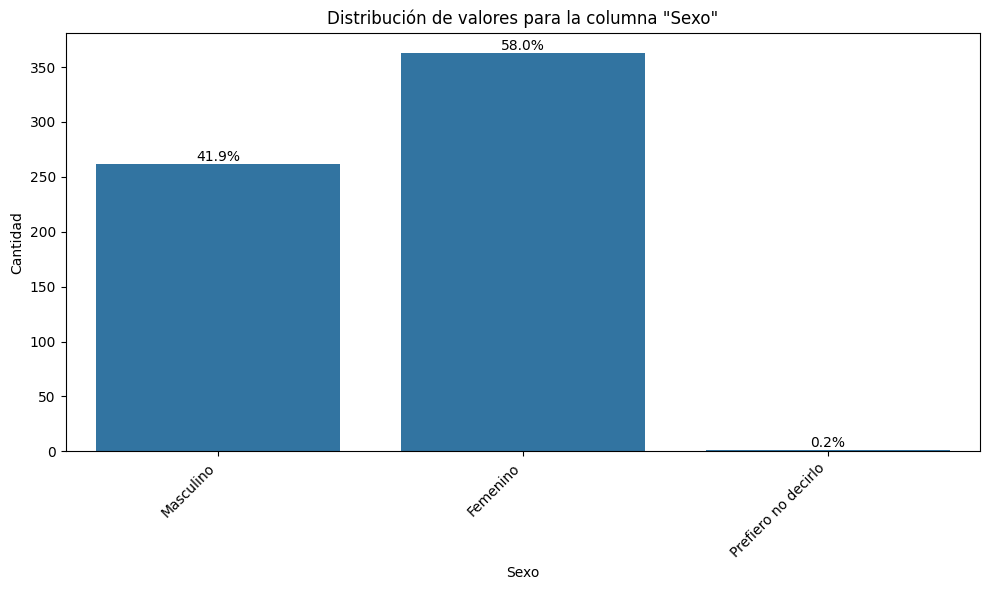

Conteo para la columna 'Estrato ':
Estrato 
2    43.929712
3    31.789137
1    14.696486
4     7.827476
0     1.118211
5     0.638978
Name: proportion, dtype: float64



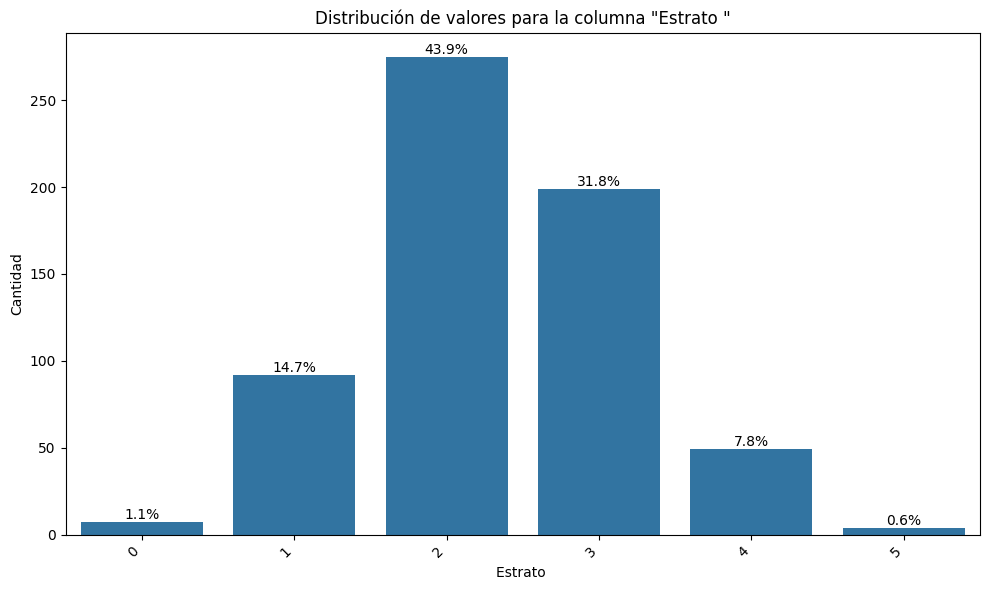

Conteo para la columna 'Carrera':
Carrera
Medicina Veterinaria y Zootecnia    29.712460
Contaduría pública                  23.642173
Derecho                             15.175719
Administración de Empresas          13.418530
Ingeniería Civil                    10.543131
Ingeniería de Sistemas               7.507987
Name: proportion, dtype: float64



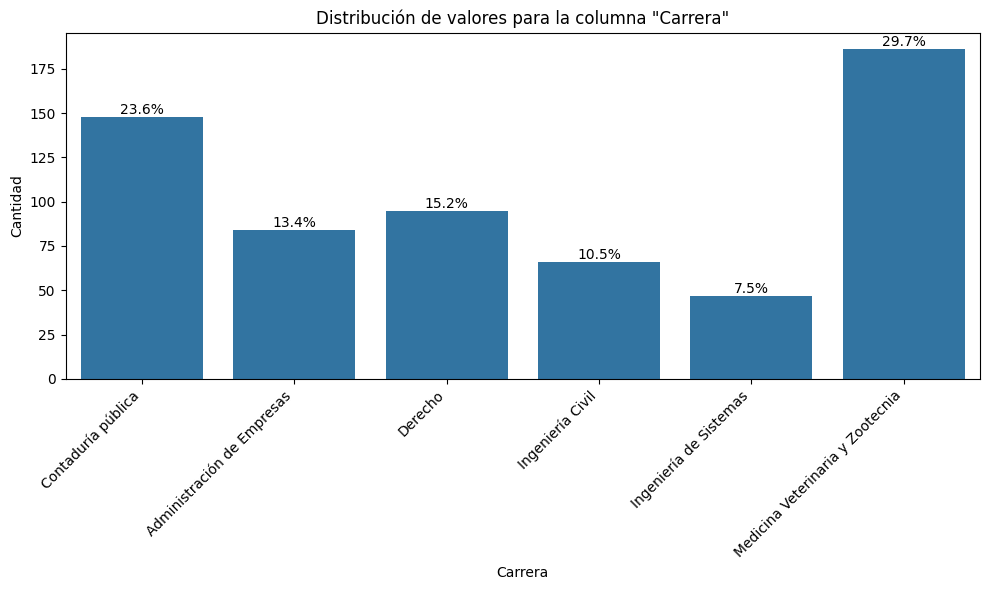

Conteo para la columna 'Semestre':
Semestre
Semestre 1     24.920128
Semestre 3     15.495208
Semestre 5     15.175719
Semestre 6     11.821086
Semestre 7     11.501597
Semestre 2      5.910543
Semestre 8      4.153355
Semestre 4      3.674121
Semestre 10     3.674121
Semestre 9      3.674121
Name: proportion, dtype: float64



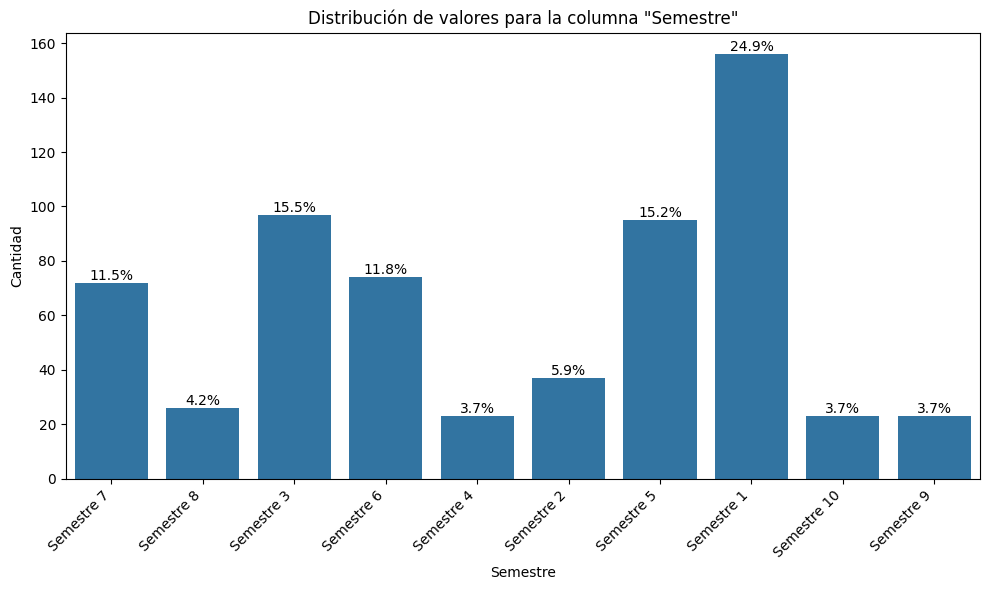

Conteo para la columna 'Edad':
Edad
Entre 19 y 21 años     39.936102
Entre 16 y 18 años     31.150160
Entre 22 y 24 años     15.175719
25 años en adelante    13.738019
Name: proportion, dtype: float64



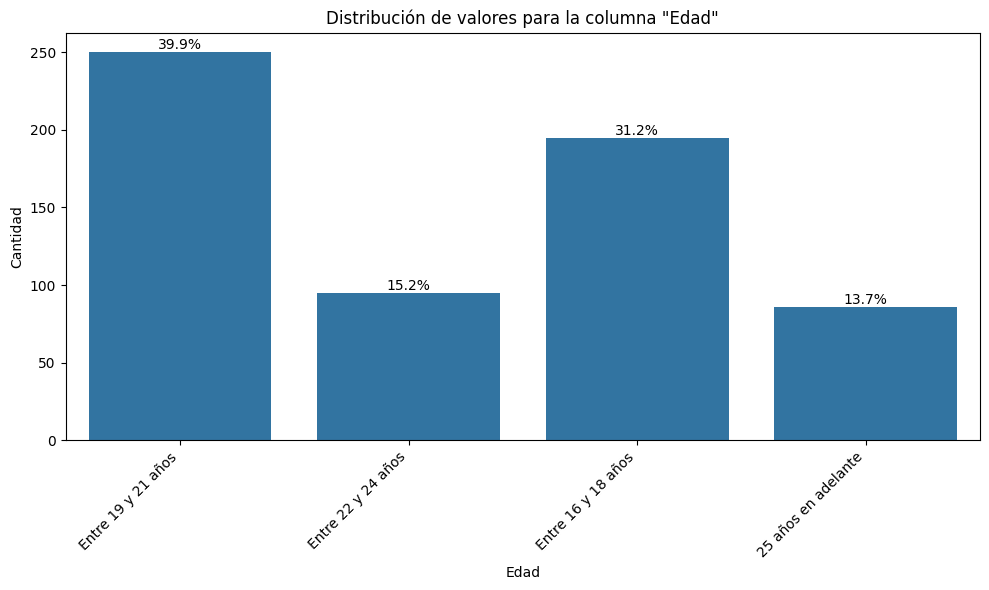

Conteo para la columna 'CI1':
CI1
Muy importante     66.134185
Importante         31.469649
Poco importante     2.396166
Name: proportion, dtype: float64



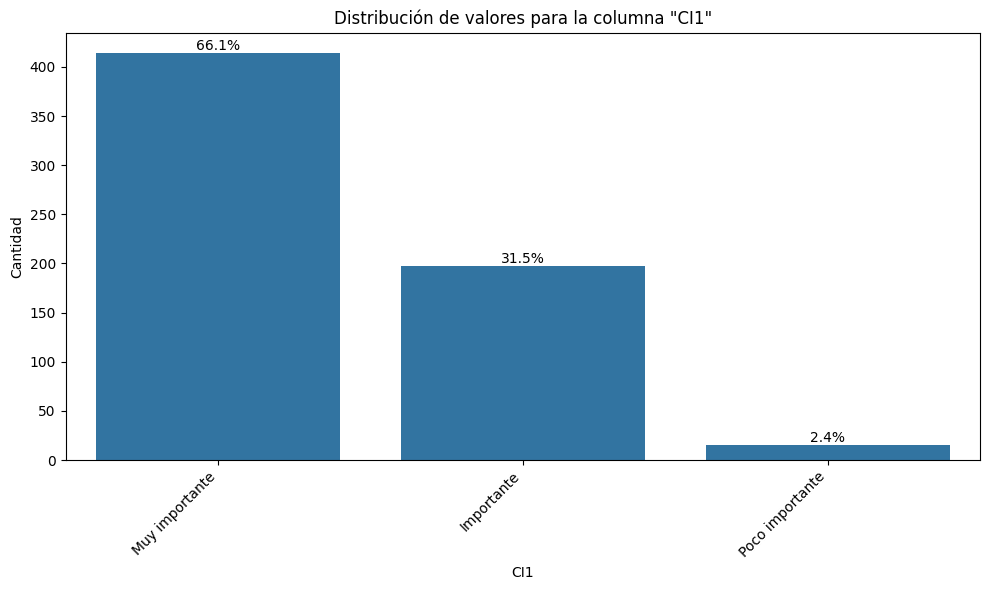

Conteo para la columna 'CI2':
CI2
Algunas veces    42.971246
Casi siempre     39.616613
Siempre          12.460064
Casi nunca        3.993610
Nunca             0.958466
Name: proportion, dtype: float64



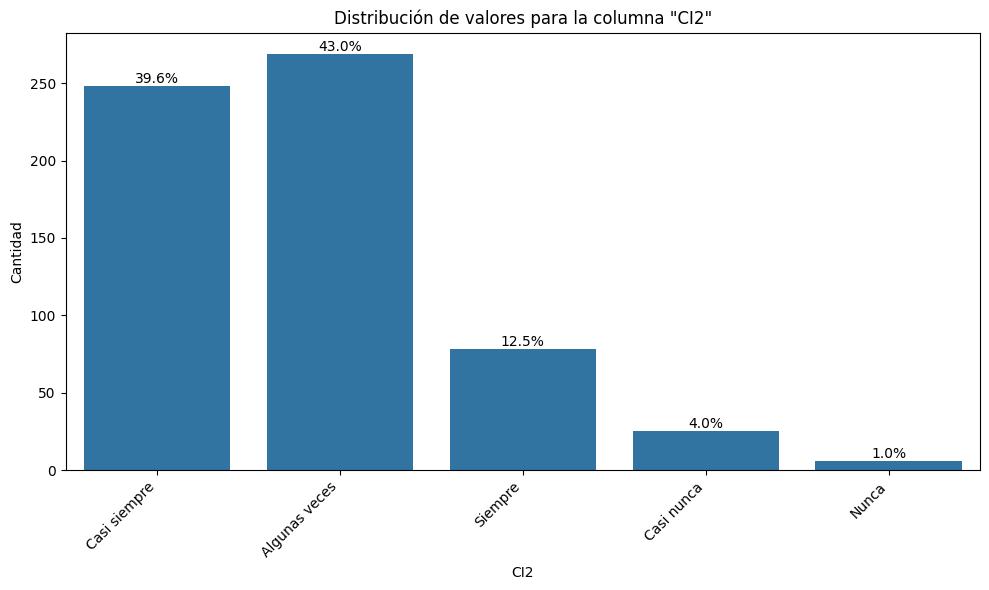

Conteo para la columna 'CI3':
CI3
4    48.402556
3    35.143770
5    11.341853
2     3.993610
1     1.118211
Name: proportion, dtype: float64



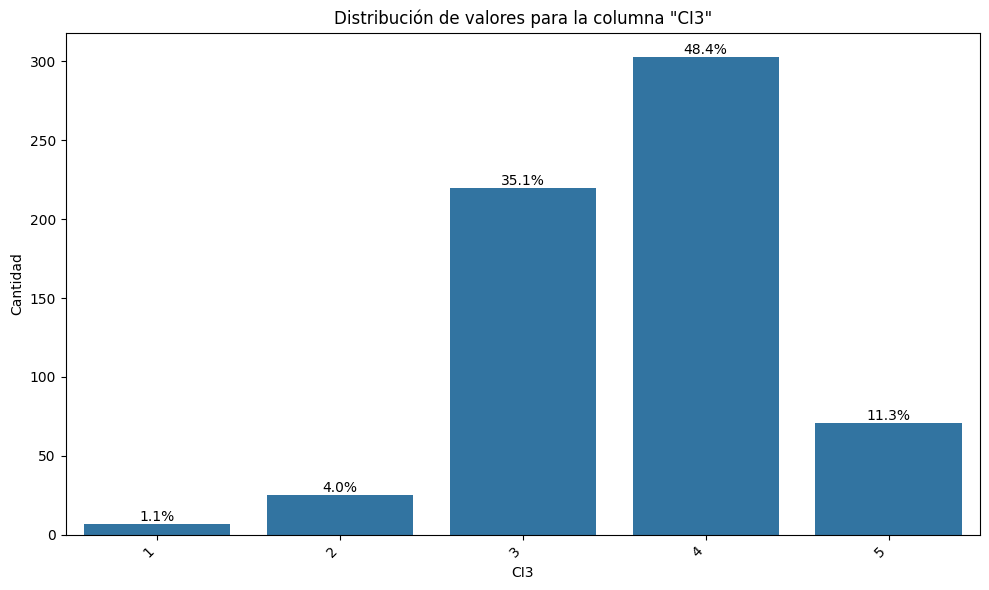

Conteo para la columna 'CI4':
CI4
Positivamente        57.667732
Neutro               26.996805
Muy positivamente    14.057508
Negativamente         0.798722
Muy negativamente     0.479233
Name: proportion, dtype: float64



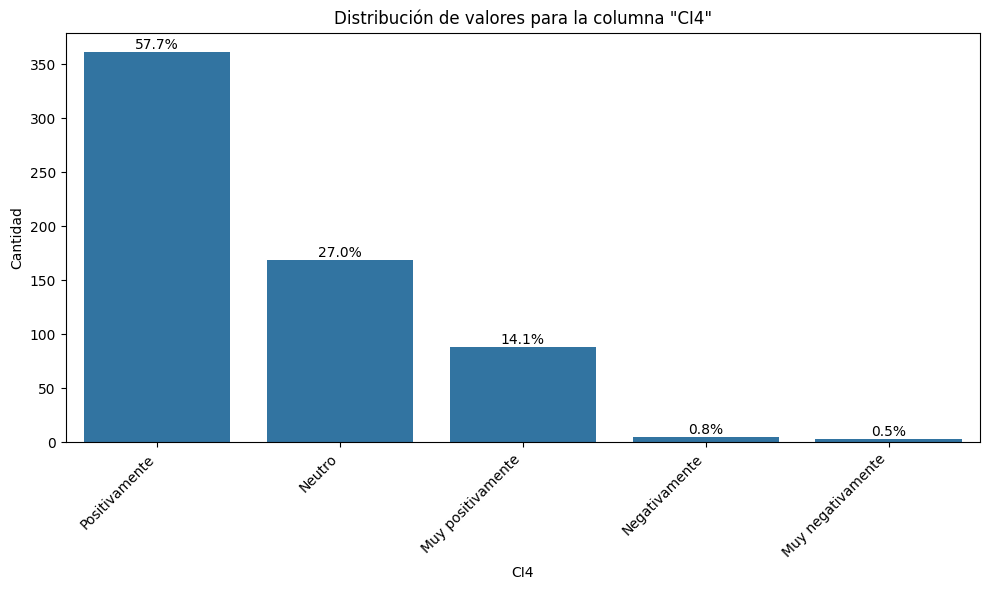

Conteo para la columna 'CI5':
CI5
Muy necesario     47.284345
Necesario         38.977636
Neutral           12.460064
Poco necesario     0.958466
Nada necesario     0.319489
Name: proportion, dtype: float64



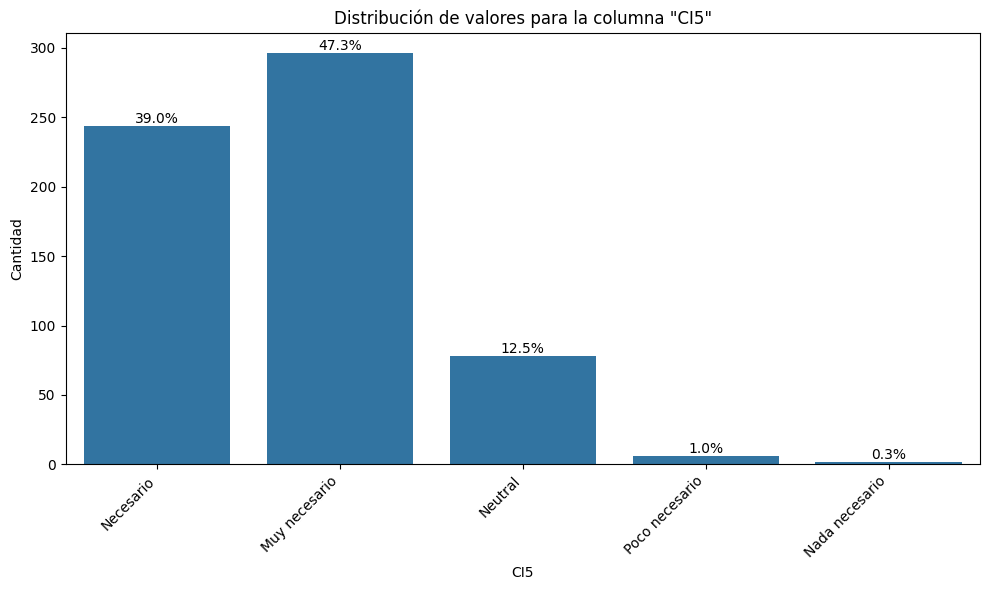

Conteo para la columna 'AC1':
AC1
Muy importante     67.412141
Importante         31.469649
Poco importante     0.958466
Nada importante     0.159744
Name: proportion, dtype: float64



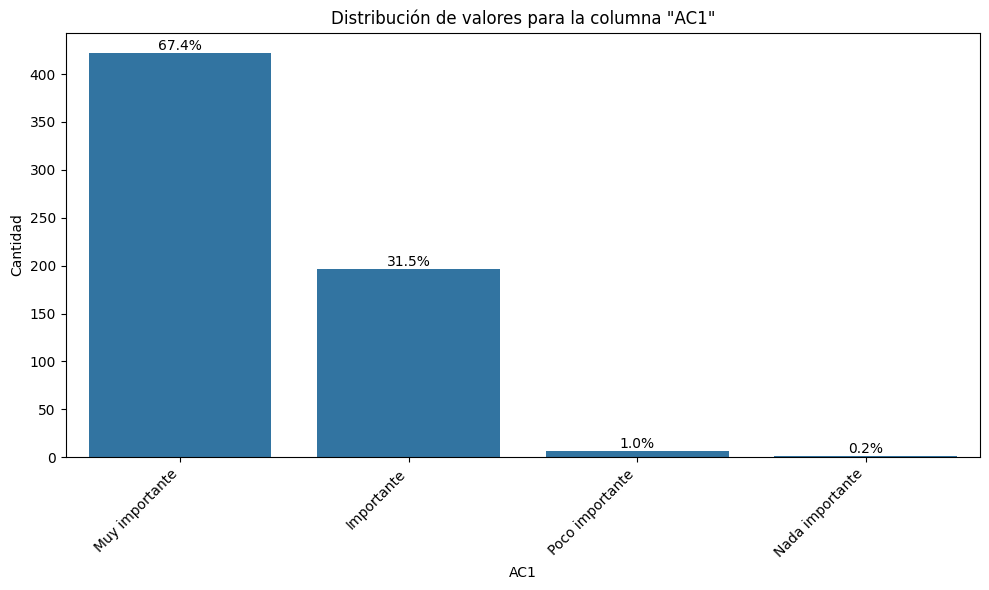

Conteo para la columna 'AC2':
AC2
Casi siempre     52.236422
Siempre          25.079872
Algunas veces    21.086262
Casi nunca        1.437700
Nunca             0.159744
Name: proportion, dtype: float64



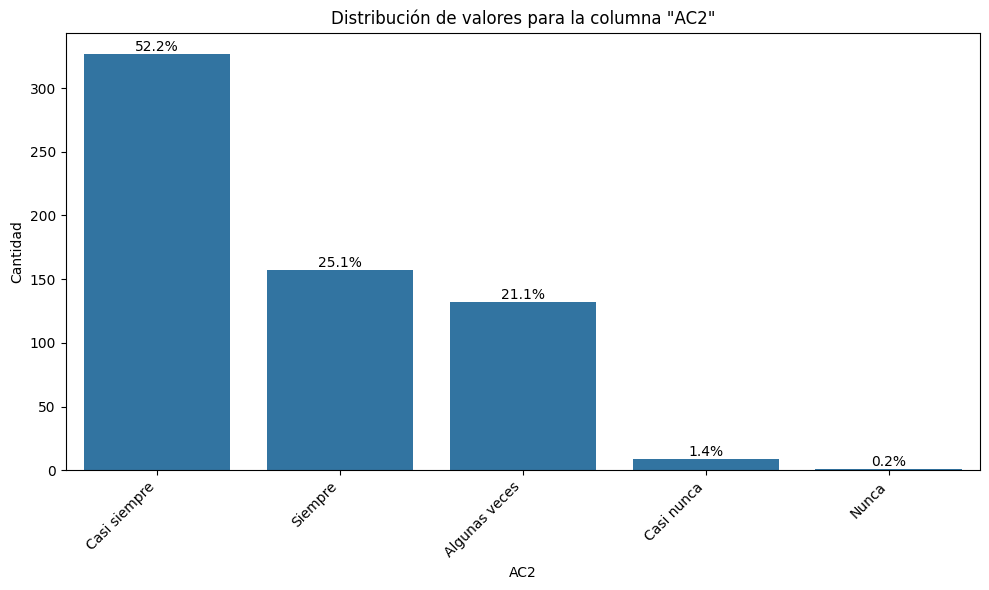

Conteo para la columna 'AC3_1':
AC3_1
4.  Alto        52.875399
3.  Moderado    25.079872
5. Muy alto     20.926518
2. Bajo          0.798722
1. Muy bajo      0.319489
Name: proportion, dtype: float64



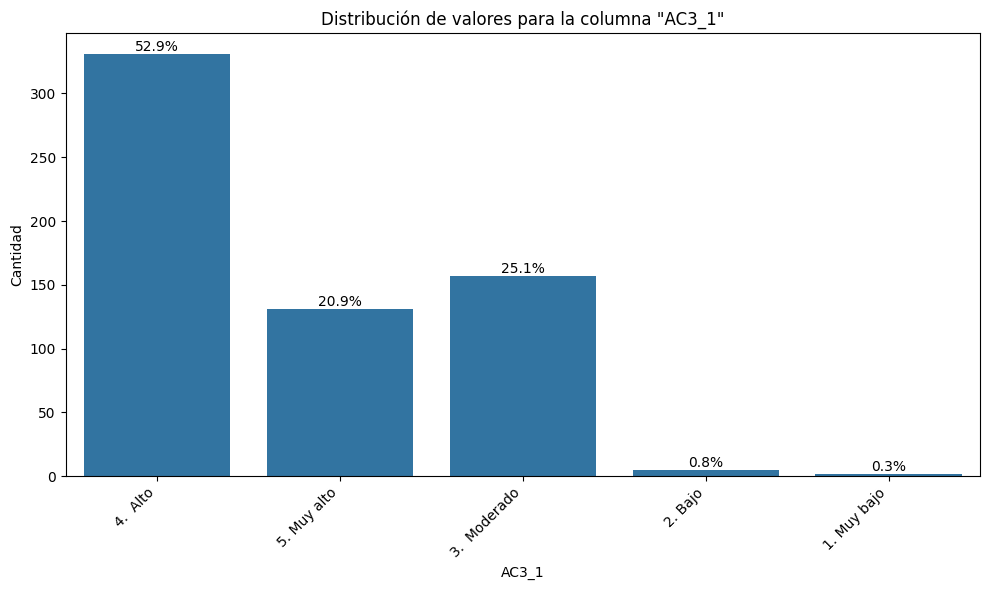

Conteo para la columna 'AC3_2':
AC3_2
4.  Alto        45.527157
5. Muy alto     26.837061
3.  Moderado    25.239617
2. Bajo          1.916933
1. Muy bajo      0.479233
Name: proportion, dtype: float64



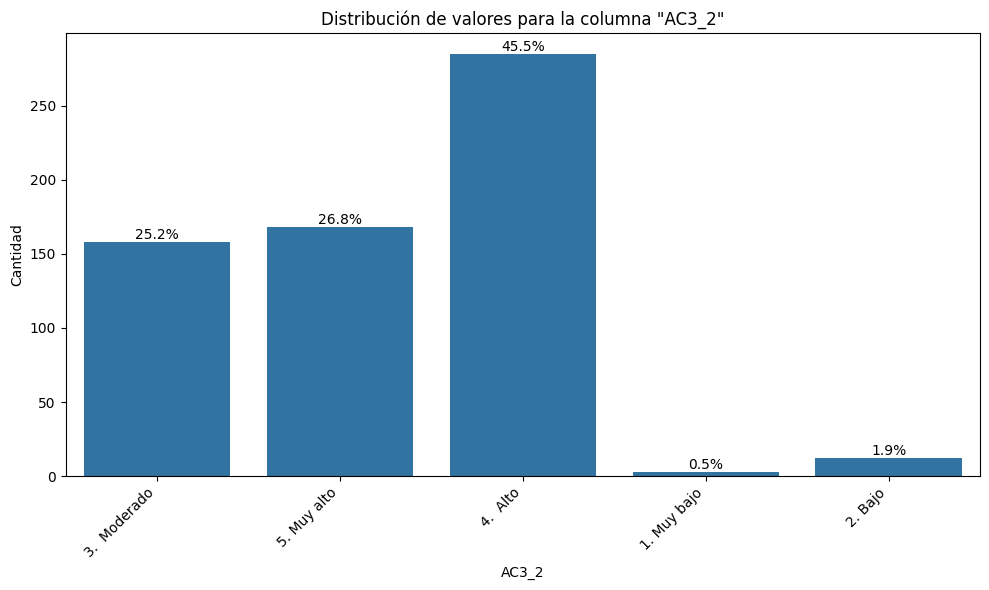

Conteo para la columna 'AC3_3':
AC3_3
4.  Alto        42.332268
3.  Moderado    27.156550
5. Muy alto     25.878594
2. Bajo          2.875399
1. Muy bajo      1.437700
Ns/Nr            0.319489
Name: proportion, dtype: float64



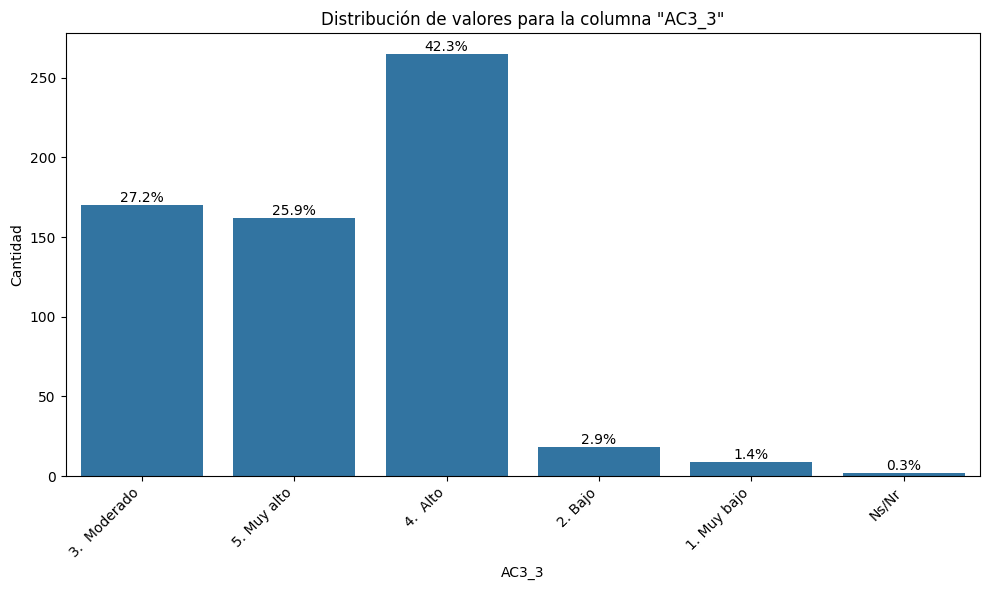

Conteo para la columna 'AC3_4':
AC3_4
4.  Alto        49.041534
5. Muy alto     26.837061
3.  Moderado    21.565495
2. Bajo          1.277955
1. Muy bajo      0.798722
Ns/Nr            0.479233
Name: proportion, dtype: float64



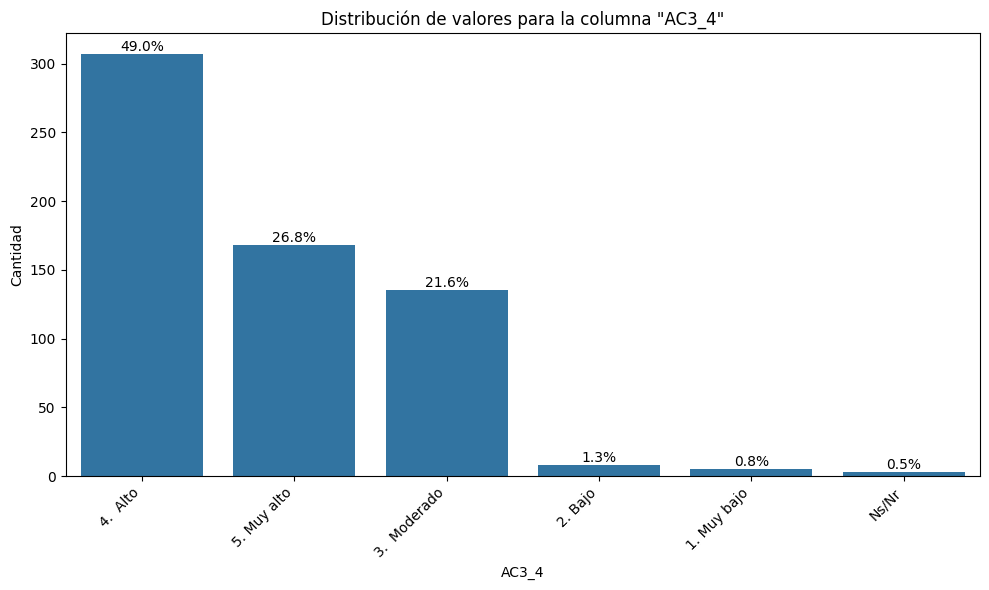

Conteo para la columna 'AC4':
AC4
Positivamente        62.619808
Muy positivamente    19.648562
Neutro               15.974441
Negativamente         1.437700
Muy negativamente     0.319489
Name: proportion, dtype: float64



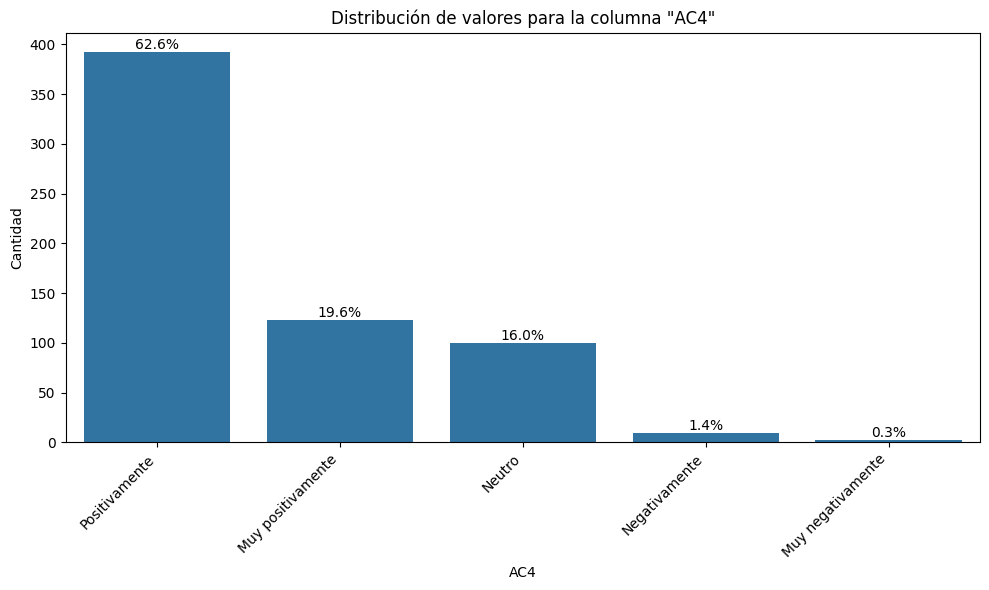

Conteo para la columna 'COM1':
COM1
Muy importante     69.648562
Importante         28.753994
Poco importante     1.597444
Name: proportion, dtype: float64



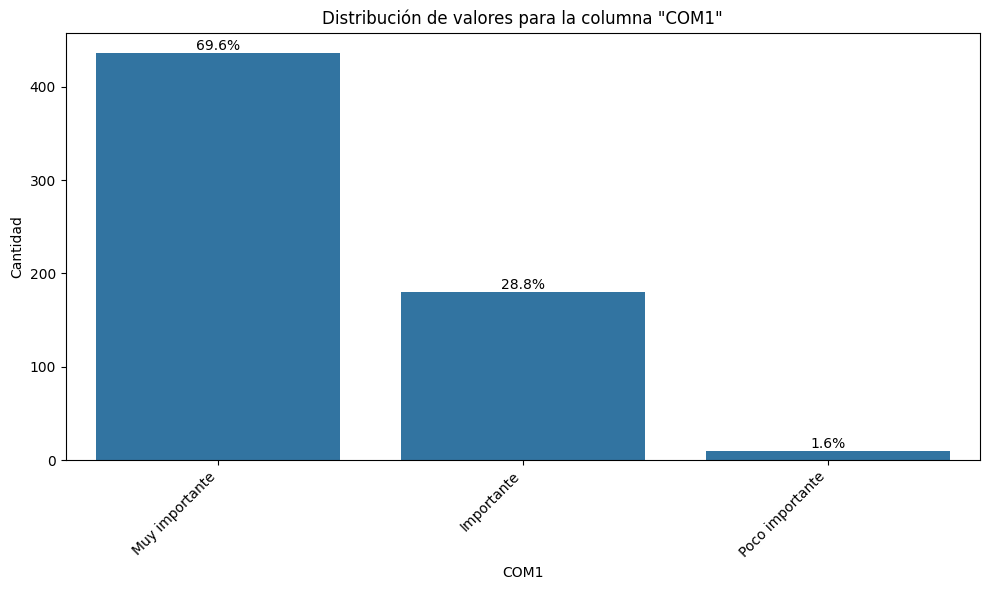

Conteo para la columna 'COM2':
COM2
Casi siempre     43.290735
Siempre          35.303514
Algunas veces    19.329073
Casi nunca        1.916933
Nunca             0.159744
Name: proportion, dtype: float64



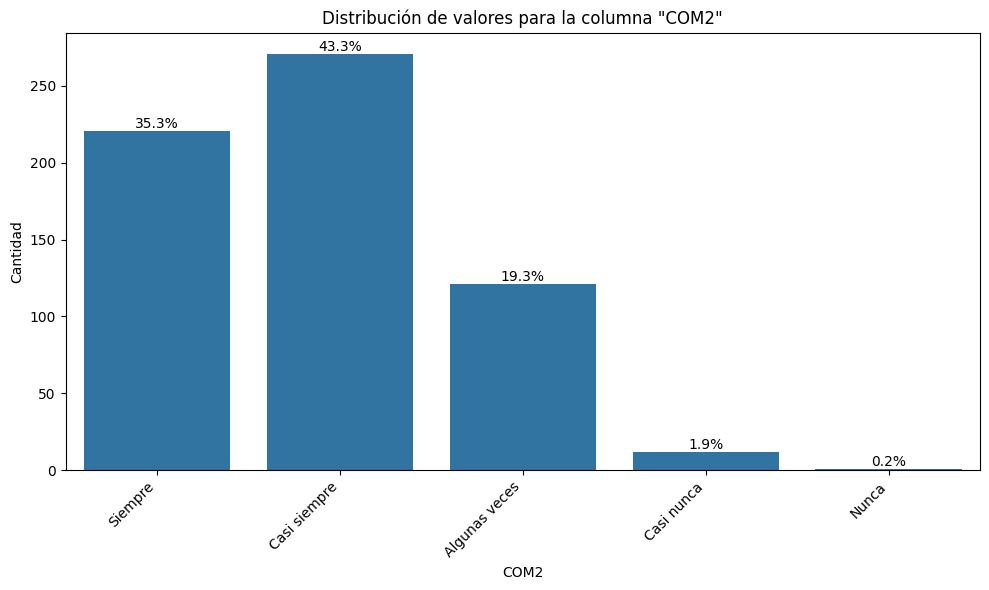

Conteo para la columna 'COM3_1':
COM3_1
4 - Alto        38.338658
3 - Moderado    29.552716
5 - Muy alto    24.920128
2 - Bajo         5.910543
1 - Muy bajo     1.277955
Name: proportion, dtype: float64



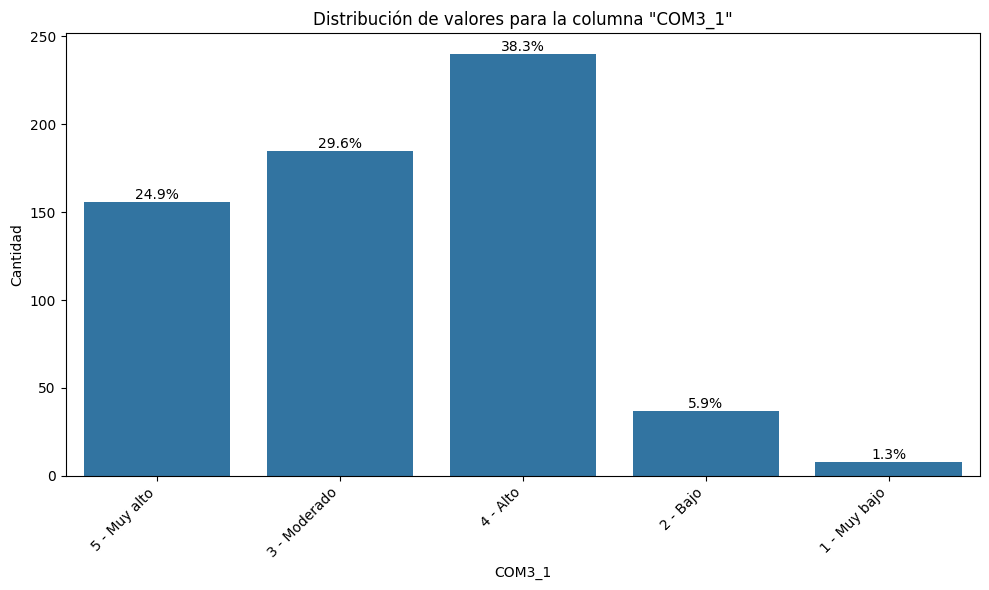

Conteo para la columna 'COM3_2':
COM3_2
4 - Alto        46.485623
3 - Moderado    27.635783
5 - Muy alto    22.364217
2 - Bajo         3.354633
1 - Muy bajo     0.159744
Name: proportion, dtype: float64



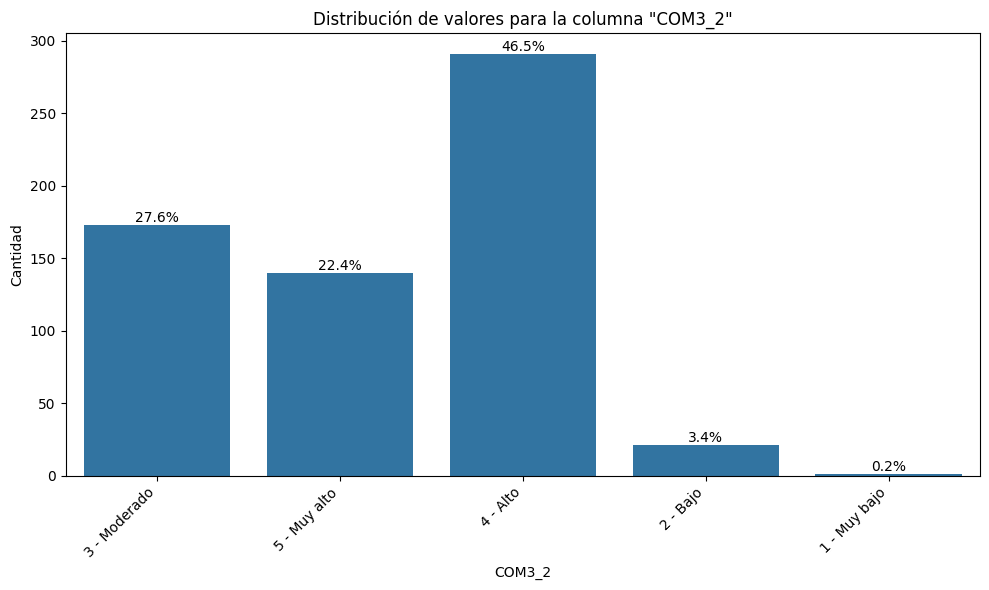

Conteo para la columna 'COM3_3':
COM3_3
4 - Alto        34.025559
3 - Moderado    33.706070
5 - Muy alto    23.003195
2 - Bajo         7.348243
1 - Muy bajo     1.916933
Name: proportion, dtype: float64



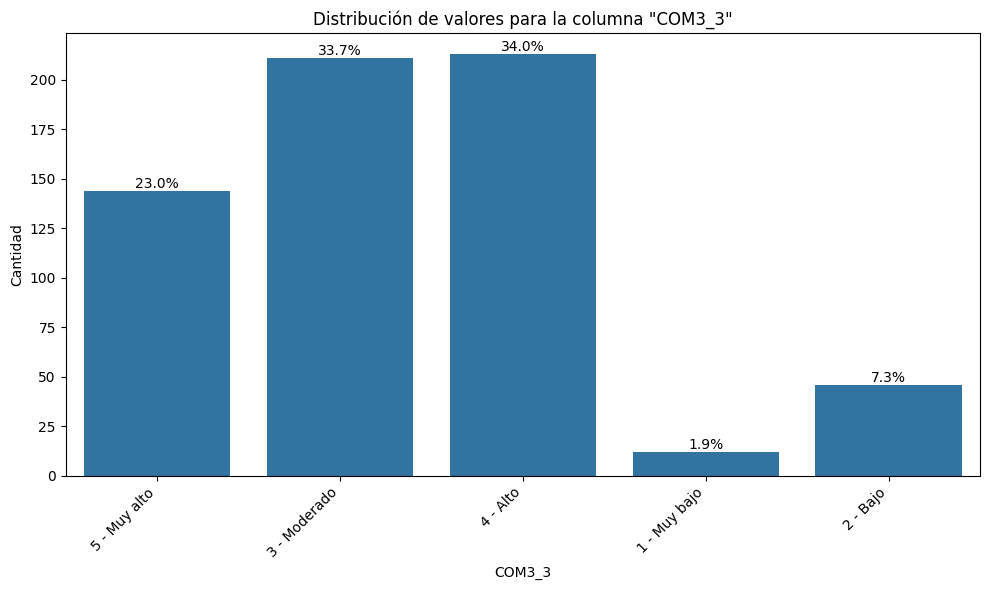

Conteo para la columna 'COM4':
COM4
Positivamente        53.354633
Muy positivamente    24.121406
Neutro               20.766773
Negativamente         1.597444
Muy negativamente     0.159744
Name: proportion, dtype: float64



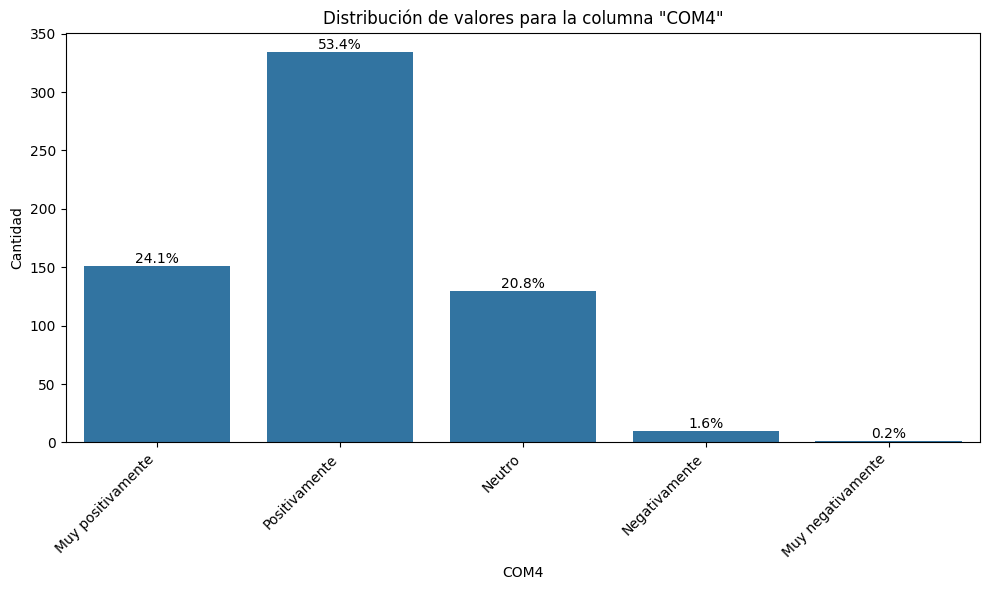

In [ ]:
for col in df.columns:
  conteo = df[col].value_counts(normalize=True) * 100  # Calculate percentages
  print(f"Conteo para la columna '{col}':\n{conteo}\n")

  # Create a bar plot
  plt.figure(figsize=(10, 6))  # Adjust figure size as needed
  sns.countplot(x=col, data=df)
  plt.title(f'Distribución de valores para la columna "{col}"')
  plt.xlabel(col)
  plt.ylabel('Cantidad')
  plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

  # Annotate bars with percentages
  for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height/len(df)*100:.1f}%', (p.get_x() + p.get_width() / 2., height),
                   ha='center', va='bottom', fontsize=10) # Added percentage annotation

  plt.tight_layout() # Improves layout to avoid overlapping labels
  plt.show()

In [ ]:
# prompt: Necesito volver todos lo datos de tipo int64 pero empecemos por la columna de sexo que metodo debo aplicar si quiero convertir los datos forma numerica pero que ningun dato tenga mayor valor que otro, se podria usar labelEncoder pero en este caso en la columna sexo hay 3 opciones como se podria resolver entonces

from sklearn.preprocessing import LabelEncoder

# Crea una instancia de LabelEncoder
le = LabelEncoder()

# Ajusta y transforma la columna 'Sexo'
df['Sexo'] = le.fit_transform(df['Sexo'])

# Imprime los valores únicos de la columna 'Sexo' después de la transformación
print(df['Sexo'].unique())




df.info()

[1 0 2]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sexo      626 non-null    int64 
 1   Estrato   626 non-null    int64 
 2   Carrera   626 non-null    object
 3   Semestre  626 non-null    object
 4   Edad      626 non-null    object
 5   CI1       626 non-null    object
 6   CI2       626 non-null    object
 7   CI3       626 non-null    int64 
 8   CI4       626 non-null    object
 9   CI5       626 non-null    object
 10  AC1       626 non-null    object
 11  AC2       626 non-null    object
 12  AC3_1     626 non-null    object
 13  AC3_2     626 non-null    object
 14  AC3_3     626 non-null    object
 15  AC3_4     626 non-null    object
 16  AC4       626 non-null    object
 17  COM1      626 non-null    object
 18  COM2      626 non-null    object
 19  COM3_1    626 non-null    object
 20  COM3_2    626 non-null    object
 21  COM3_3  

In [ ]:
# Verificar y limpiar los nombres de las columnas para evitar errores
df.columns = df.columns.str.strip()

# Mapeo para la columna 'Carrera'
mapeo_carrera = {
    'Administración de Empresas': 0,
    'Contaduría pública': 1,
    'Derecho': 2,
    'Ingeniería Civil': 3,
    'Ingeniería de Sistemas': 4,
    'Medicina Veterinaria y Zootecnia': 5
}

# Reemplazar valores en la columna 'Carrera' si existe
if 'Carrera' in df.columns:
    df['Carrera'] = df['Carrera'].replace(mapeo_carrera).astype(int)

# Mapeo para la columna 'Semestre'
mapeo_semestre = {
    'Semestre 1': 1,
    'Semestre 2': 2,
    'Semestre 3': 3,
    'Semestre 4': 4,
    'Semestre 5': 5,
    'Semestre 6': 6,
    'Semestre 7': 7,
    'Semestre 8': 8,
    'Semestre 9': 9,
    'Semestre 10': 10
}

# Reemplazar valores en la columna 'Semestre' si existe
if 'Semestre' in df.columns:
    df['Semestre'] = df['Semestre'].replace(mapeo_semestre).astype(int)

# Mapeo para la columna 'Edad'
mapeo_edad = {
    'Entre 16 y 18 años': 1,
    'Entre 19 y 21 años': 2,
    'Entre 22 y 24 años': 3,
    '25 años en adelante': 4
}

# Reemplazar valores en la columna 'Edad' si existe
if 'Edad' in df.columns:
    df['Edad'] = df['Edad'].replace(mapeo_edad).astype(int)


<ipython-input-122-530bcfb917ef>:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Carrera'] = df['Carrera'].replace(mapeo_carrera).astype(int)
<ipython-input-122-530bcfb917ef>:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Semestre'] = df['Semestre'].replace(mapeo_semestre).astype(int)
<ipython-input-122-530bcfb917ef>:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
columnas_categoricas = [
    'CI1', 'CI2', 'CI4', 'CI5',
    'AC1', 'AC2', 'AC3_1', 'AC3_2', 'AC3_3', 'AC3_4', 'AC4',
    'COM1', 'COM2', 'COM3_1', 'COM3_2', 'COM3_3', 'COM4'
]

# Crear una instancia de OrdinalEncoder
encoder = OrdinalEncoder()

# Aplicar el encoder a las columnas categóricas
df[columnas_categoricas] = encoder.fit_transform(df[columnas_categoricas])

# Convertir las columnas codificadas a int64
df[columnas_categoricas] = df[columnas_categoricas].astype('int64')

# Mostrar el DataFrame resultante para verificar la conversión
print(df.dtypes)
print(df.head())

Sexo        int64
Estrato     int64
Carrera     int64
Semestre    int64
Edad        int64
CI1         int64
CI2         int64
CI3         int64
CI4         int64
CI5         int64
AC1         int64
AC2         int64
AC3_1       int64
AC3_2       int64
AC3_3       int64
AC3_4       int64
AC4         int64
COM1        int64
COM2        int64
COM3_1      int64
COM3_2      int64
COM3_3      int64
COM4        int64
dtype: object
   Sexo  Estrato  Carrera  Semestre  Edad  CI1  CI2  CI3  CI4  CI5  ...  \
0     1        3        1         7     2    1    2    3    4    2  ...   
1     1        2        1         7     2    0    0    4    3    0  ...   
2     0        2        1         8     2    0    0    3    3    2  ...   
3     0        2        1         7     3    1    0    4    4    3  ...   
4     1        5        0         3     2    0    4    4    4    0  ...   

   AC3_2  AC3_3  AC3_4  AC4  COM1  COM2  COM3_1  COM3_2  COM3_3  COM4  
0      2      2      3    4     1     4       4  

In [ ]:
# prompt: Aplica minmaxscaler para todas las columnas teniendo en cuenta que todas las columnas son numericas

from sklearn.preprocessing import MinMaxScaler

# Crea una instancia de MinMaxScaler
scaler = MinMaxScaler()

# Selecciona todas las columnas numéricas
numeric_cols = df.select_dtypes(include=['number']).columns

# Ajusta y transforma las columnas numéricas
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Muestra el DataFrame resultante
print(df.head())

   Sexo  Estrato  Carrera  Semestre      Edad  CI1  CI2   CI3   CI4   CI5  \
0   0.5      0.6      0.2  0.666667  0.333333  0.5  0.5  0.50  1.00  0.50   
1   0.5      0.4      0.2  0.666667  0.333333  0.0  0.0  0.75  0.75  0.00   
2   0.0      0.4      0.2  0.777778  0.333333  0.0  0.0  0.50  0.75  0.50   
3   0.0      0.4      0.2  0.666667  0.666667  0.5  0.0  0.75  1.00  0.75   
4   0.5      1.0      0.0  0.222222  0.333333  0.0  1.0  0.75  1.00  0.00   

   ...  AC3_2  AC3_3  AC3_4   AC4  COM1  COM2  COM3_1  COM3_2  COM3_3  COM4  
0  ...   0.50    0.4    0.6  1.00   0.5   1.0    1.00    0.50    1.00  0.25  
1  ...   1.00    0.8    0.8  0.25   0.5   1.0    1.00    1.00    1.00  0.25  
2  ...   0.75    0.6    0.6  0.75   0.0   0.5    0.50    0.75    0.50  1.00  
3  ...   0.50    0.6    0.6  1.00   0.5   0.0    0.75    0.50    0.50  1.00  
4  ...   0.00    0.4    0.4  0.25   0.5   1.0    0.75    0.75    0.75  0.25  

[5 rows x 23 columns]


In [ ]:
# prompt: agreguemos entonces esa variable desempeño profesional y hagamos lo que planteas

# Suponiendo que 'DesempeñoProfesional' es una nueva columna que representa el desempeño profesional
# y que ya está agregada al DataFrame 'df'.  Esta es una variable de ejemplo, deberás definirla según tu criterio.

# Ejemplo de creación de la variable 'DesempeñoProfesional' (puedes modificarlo):
df['DesempeñoProfesional'] = (df['Sexo'] + df['Estrato'] + df['Carrera'] + df['Semestre'] + df['Edad'] + df['CI1'] + df['CI2'] + df['CI3'] + df['CI4'] + df['CI5'] + df['AC1'] + df['AC2'] + df['AC3_1'] + df['AC3_2'] + df['AC3_3'] + df['AC3_4'] +
                             df['AC4'] + df['COM1'] + df['COM2'] + df['COM3_1'] + df['COM3_2'] + df['COM3_3'] + df['COM4']) / 23  # Promedio de las puntuaciones





In [ ]:
# prompt: Una vez tenemos nuestras variable dependiente e independientes como podemos sacar una lista de las 10 variables mas influyentes  ?

import pandas as pd
import numpy as np

# ... (Your existing code) ...

# Suponiendo que 'DesempeñoProfesional' es tu variable dependiente
# y que ya está agregada al DataFrame 'df' (como en el ejemplo anterior).

# Calcula la correlación entre 'DesempeñoProfesional' y las demás variables
correlations = df.corr()['DesempeñoProfesional'].drop('DesempeñoProfesional')

# Obtén las 10 variables más influyentes (en valor absoluto)
top_10_influyentes = correlations.abs().nlargest(10)

print("Las 10 variables más influyentes en el Desempeño Profesional son:")
top_10_influyentes

Las 10 variables más influyentes en el Desempeño Profesional son:


,DesempeñoProfesional
COM3_1,0.615084
AC3_1,0.602840
COM3_3,0.587537
AC3_3,0.580589
COM3_2,0.571378
COM2,0.540723
AC2,0.526806
AC3_2,0.493728
AC3_4,0.481745
CI3,0.457562


COM3_1: En una escala del 1 al 5, donde 5 es la calificación más alta, cómo calificarías tus habilidades comunicativas Comunicación oral (Ejemplo exposiciones)

AC3_1: En una escala del 1 al 5, donde 5 es la calificación más alta, califica los aspectos relacionados con tu autoconciencia Autoconocimiento

COM3_3: En una escala del 1 al 5, donde 5 es la calificación más alta, cómo calificarías tus habilidades comunicativas Expresión corporal (tono de voz, manejo de público)

AC3_3: En una escala del 1 al 5, donde 5 es la calificación más alta, califica los aspectos relacionados con tu autoconciencia Automotivación

COM3_2: En una escala del 1 al 5, donde 5 es la calificación más alta, cómo calificarías tus habilidades comunicativas Comunicación escrita (ej. trabajos, redacción)

COM2: ¿Con qué frecuencia aplicas la comunicación oral, escrita y expresión corporal, en tu formación profesional?

AC2: ¿Con qué frecuencia aplicas la autoconciencia en tu formación profesional?

AC3_2: En una escala del 1 al 5, donde 5 es la calificación más alta, califica los aspectos relacionados con tu autoconciencia Autocontrol

AC3_4: En una escala del 1 al 5, donde 5 es la calificación más alta, califica los aspectos relacionados con tu autoconciencia Autoimagen

CI3: En una escala de 1 a 5 donde 5 la calificación más alta, ¿Qué tan creativo e innovador te consideras?



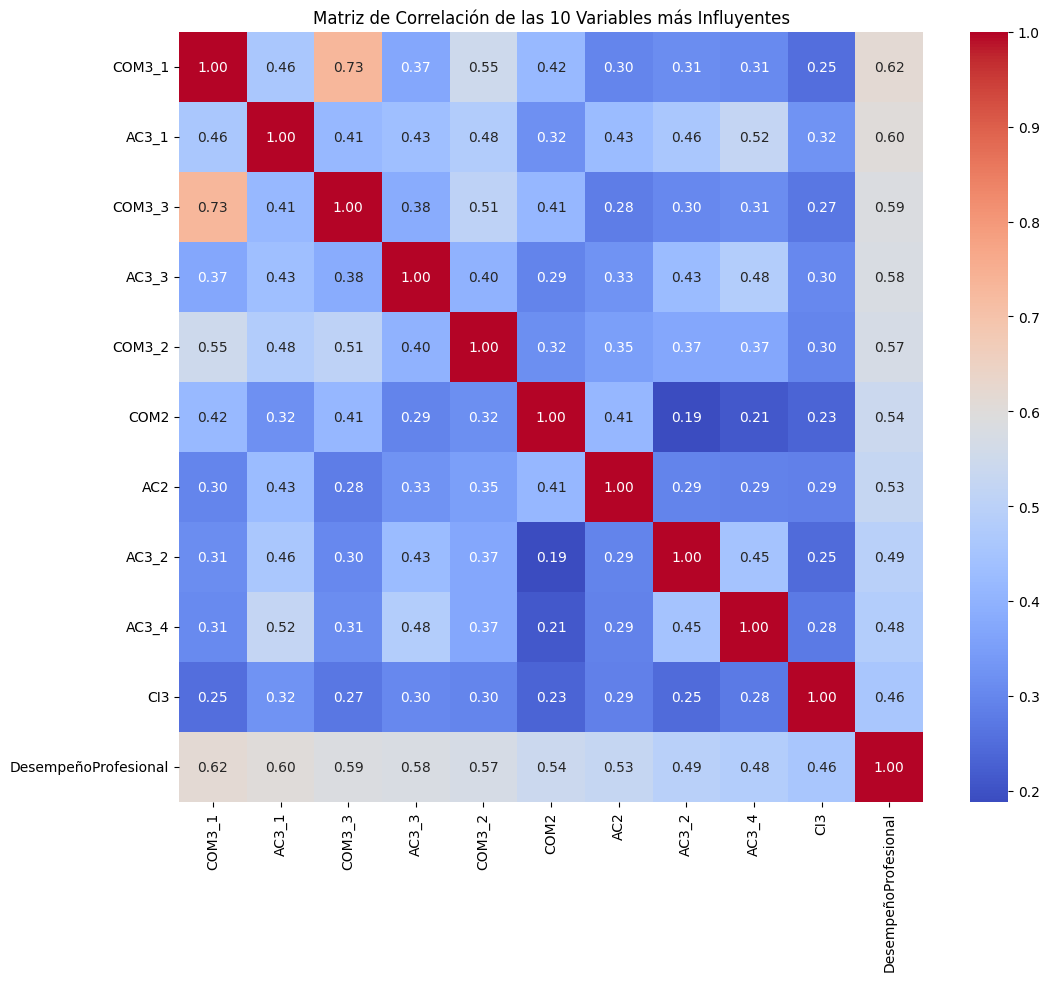

In [ ]:
# prompt: Ahora quiero hacer una matriz de correlacion con esas 10 variables mas influyentes

# Selecciona las 10 variables más influyentes
top_10_variables = top_10_influyentes.index

# Crea una matriz de correlación solo con las 10 variables más influyentes y 'DesempeñoProfesional'
matriz_correlacion = df[top_10_variables.tolist() + ['DesempeñoProfesional']].corr()

# Crea el mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de las 10 Variables más Influyentes')
plt.show()

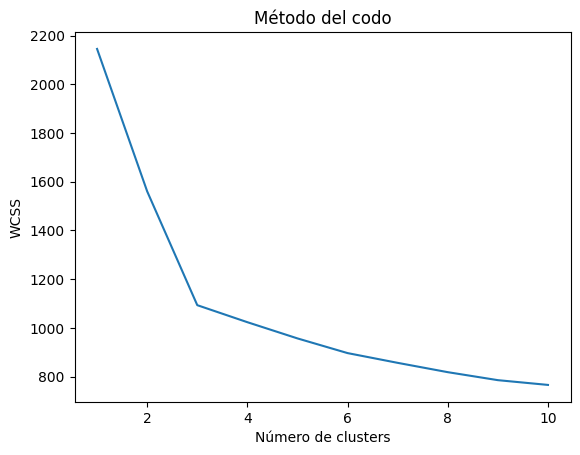

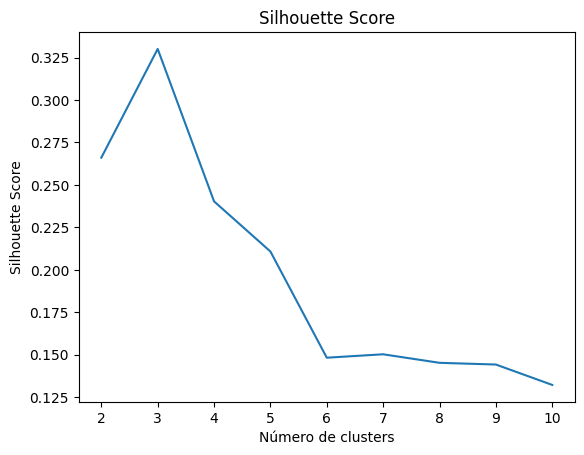

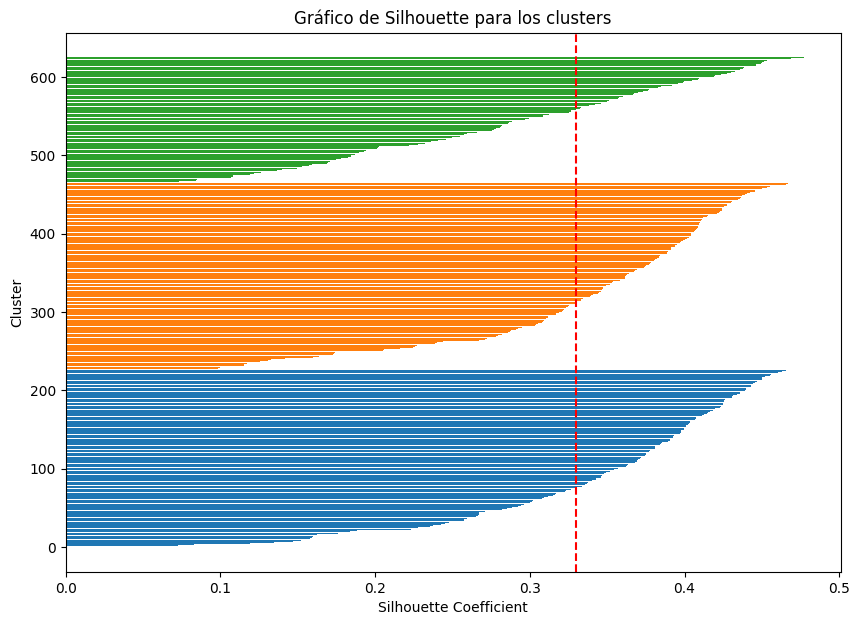

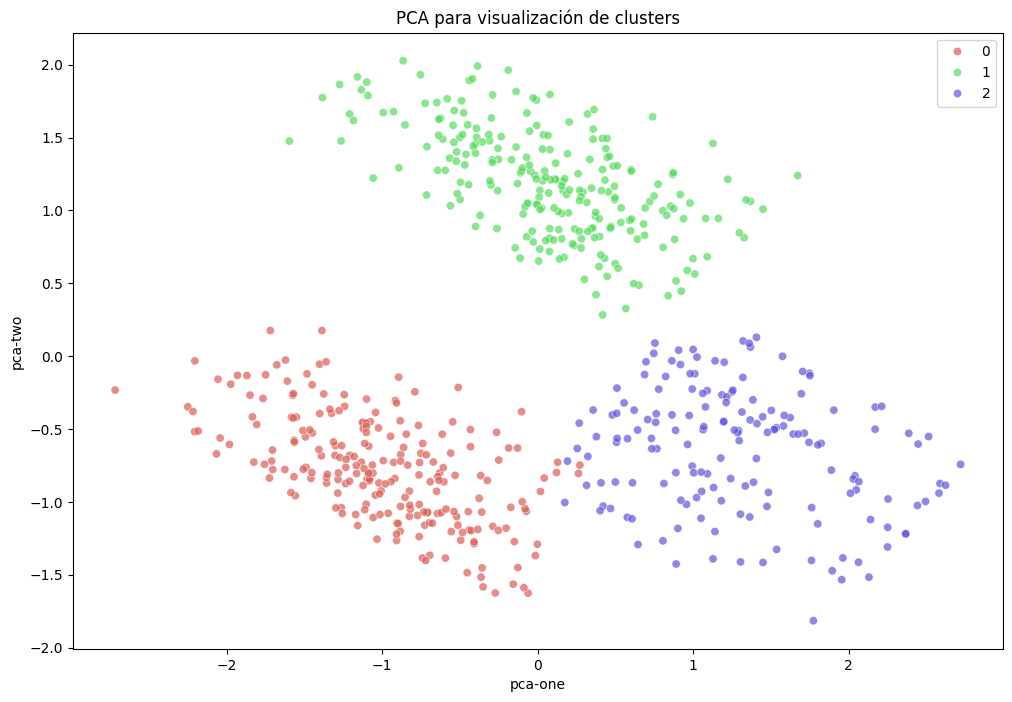

In [ ]:
# prompt: Quisiera definir saber el numero de cluster optimo segun el metodo del codo y el metodo silhouette score para todo el data set  y dibuja el pca de los clusters recomendados

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Método del codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

# Silhouette Score
silhouette_scores = []
for i in range(2, 11):  # Se empieza en 2 porque se necesitan al menos dos clusters para el silhouette score
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_scores.append(silhouette_avg)
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Determina el número óptimo de clusters (según el método del codo y silhouette)
optimal_clusters = 3  # Cambia según tus gráficas

# Gráfico de Silhouette para cada cluster
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(df)
silhouette_vals = silhouette_samples(df, cluster_labels)

plt.figure(figsize=(10, 7))
y_lower, y_upper = 0, 0
for i in range(optimal_clusters):
    cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none')
    y_lower += len(cluster_silhouette_vals)

plt.axvline(x=silhouette_score(df, cluster_labels), color="red", linestyle="--")
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Cluster')
plt.title('Gráfico de Silhouette para los clusters')
plt.show()

# PCA para visualización (opcional)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)
df['pca-one'] = pca_result[:, 0]
df['pca-two'] = pca_result[:, 1]

# Visualización PCA
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue=cluster_labels,
    palette=sns.color_palette("hls", optimal_clusters),
    data=df,
    legend="full",
    alpha=0.7
)
plt.title("PCA para visualización de clusters")
plt.show()


In [ ]:
# prompt: con todo lo que se ha hecho quiero entrenar dos modelos, uno aplicando k.means y otro aplicando dbscan cada uno de los modelos quiero que me lo des para descargar en un archivo .pickle

import pickle
from sklearn.cluster import DBSCAN

# ... (Your existing code) ...

# KMeans model training and saving
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df)

# Save the KMeans model to a pickle file
with open('kmeans_model.pickle', 'wb') as f:
    pickle.dump(kmeans, f)

# DBSCAN model training and saving
dbscan = DBSCAN(eps=0.5, min_samples=5) # Adjust eps and min_samples as needed
dbscan.fit(df)

# Save the DBSCAN model to a pickle file
with open('dbscan_model.pickle', 'wb') as f:
    pickle.dump(dbscan, f)

# Download the files (you might need to adjust the paths if necessary)
from google.colab import files
files.download('kmeans_model.pickle')
files.download('dbscan_model.pickle')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# prompt: Ahora entrena dos modelos mas, uno aplicando RandomForestRegressor, y otro aplicando DecisionTreeRegressor,   cada uno de los modelos quiero que me lo des para descargar en un archivo .pickle

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Define X (features) and y (target variable)
X = df.drop('DesempeñoProfesional', axis=1)  # Assuming 'DesempeñoProfesional' is your target
y = df['DesempeñoProfesional']

# RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=0)  # You can adjust hyperparameters
rf_model.fit(X, y)

# Save the RandomForestRegressor model
with open('rf_model.pickle', 'wb') as f:
    pickle.dump(rf_model, f)

# DecisionTreeRegressor model
dt_model = DecisionTreeRegressor(random_state=0) # You can adjust hyperparameters
dt_model.fit(X, y)

# Save the DecisionTreeRegressor model
with open('dt_model.pickle', 'wb') as f:
    pickle.dump(dt_model, f)

# Download the models
files.download('rf_model.pickle')
files.download('dt_model.pickle')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip freeze > requirements.txt
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>